In [2]:
from datascience import *
%matplotlib inline
path_data = '../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Empirical Distribution of a Statistic
The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

The resemblance is visible in two histograms: the empirical histogram of a large random sample is likely to resemble the histogram of the population.

As a reminder, here is the histogram of the delays of all the flights in `united`, and an empirical histogram of the delays of a random sample of 1,000 of these flights.

In [3]:
united = Table.read_table(path_data + 'united_summer2015.csv')

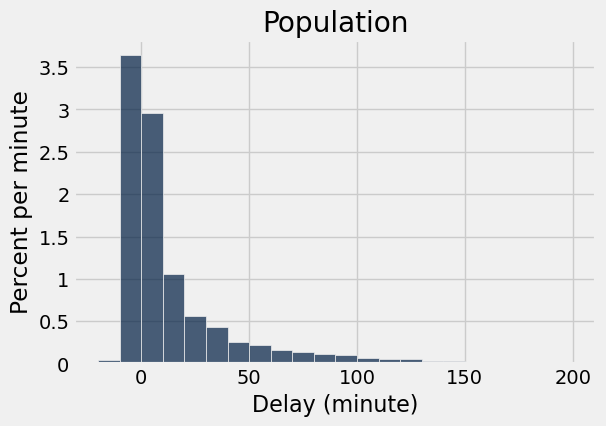

In [4]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Population')
plots.show()

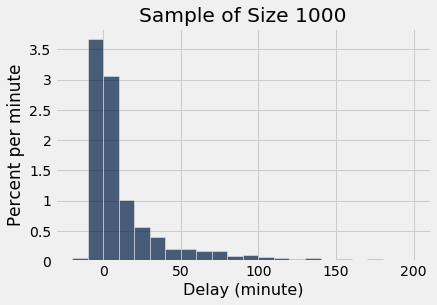

In [ ]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000')
plots.show()

The two histograms clearly resemble each other, though they are not identical. 

## Parameter
Frequently, we are interested in numerical quantities associated with a population.
- In a population of voters, what percent will vote for Candidate A?
- In a population of Facebook users, what is the largest number of Facebook friends that the users have?
- In a population of United flights, what is the median departure delay?

Numerical quantities associated with a population are called *parameters*. For the population of flights in `united`, we know the value of the parameter "median delay":

In [6]:
np.median(united.column('Delay'))

2.0

The `NumPy` function `median` returns the median (half-way point) of an array. Among all the flights in `united`, the median delay was 2 minutes. That is, about 50% of flights in the population had delays of 2 or fewer minutes:

In [7]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

Half of all flights left no more than 2 minutes after their scheduled departure time. That's a very short delay!  

**Note.** The percent isn't exactly 50 because of "ties," that is, flights that had delays of exactly 2 minutes. There were 480 such flights. Ties are quite common in data sets, and we will not worry about them in this course.

In [8]:
united.where('Delay', are.equal_to(2)).num_rows

480

## Statistic
In many situations, we will be interested in figuring out the value of an unknown parameter. For this, we will rely on data from a large random sample drawn from the population.

A *statistic* (note the singular!) is any number computed using the data in a sample. The sample median, therefore, is a statistic. 

Remember that `sample_1000` contains a random sample of 1000 flights from `united`. The observed value of the sample median is:

In [8]:
np.median(sample_1000.column('Delay'))

2.0

Our sample – one set of 1,000 flights – gave us one observed value of the statistic. This raises an important problem of inference:

**The statistic could have been different.**
A fundamental consideration in using any statistic based on a random sample is that *the sample could have come out differently*, and therefore the statistic could have come out differently too. 

In [9]:
np.median(united.sample(1000).column('Delay'))

3.0

Run the cell above a few times to see how the answer varies. Often it is equal to 2, the same value as the population parameter. But sometimes it is different.

**Just how different could the statistic have been?** One way to answer this is to simulate the statistic many times and note the values. A histogram of those values will tell us about the distribution of the statistic.

Let's recall the main steps in a simulation.

## Simulating a Statistic
We will simulate the sample median using the steps we set up in an earlier chapter when we started studying simulation. You can replace the sample size of 1000 by any other sample size, and the sample median by any other statistic.

**Step 1: Decide which statistic to simulate.** We have already decided that: we are going to simulate the median of a random sample of size 1000 drawn from the population of flight delays.

**Step 2: Define a function that returns one simulated value of the statistic.** Draw a random sample of size 1000 and compute the median of the sample. We did this in the code cell above. Here it is again, encapsulated in a function.

In [9]:
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

**Step 3: Decide how many simulated values to generate.** Let's do 5,000 repetitions.

**Step 4: Use a `for` loop to generate an array of simulated values.** As usual, we will start by creating an empty array in which to collect our results. We will then set up a `for` loop for generating all the simulated values. The body of the loop will consist of generating one simulated value of the sample median, and appending it to our collection array.

The simulation takes a noticeable amount of time to run. That is because it is performing 5000 repetitions of the process of drawing a sample of size 1000 and computing its median. That's a lot of sampling and repeating!

In [10]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

The simulation is done. All 5,000 simulated sample medians have been collected in the array `medians`. Now it's time to visualize the results. 

## Visualization

Here are the simulated random sample medians displayed in the table `simulated_medians`.

In [11]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
3
3
2
2
2
2
3
3
2
3


We can also visualize the simulated data using a histogram. The histogram is called an *empirical histogram of the statistic*. It displays the *empirical distribution* of the statistic. Remember that *empirical* means *observed*.

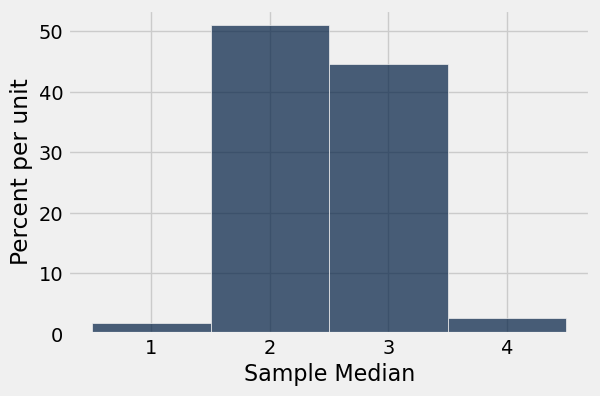

In [12]:
simulated_medians.hist(bins=np.arange(0.5, 5, 1))
plots.show()

You can see that the sample median is very likely to be about 2, which was the value of the population median. Since samples of 1000 flight delays are likely to resemble the population of delays, it is not surprising that the median delays of those samples should be close to the median delay in the population.

This is an example of how a statistic can provide a good estimate of a parameter.

## The Power of Simulation

If we could generate all possible random samples of size 1000, we would know all possible values of the statistic (the sample median), as well as the probabilities of all those values. We could visualize all the values and probabilities in the probability histogram of the statistic.

But in many situations including this one, the number of all possible samples is large enough to exceed the capacity of the computer, and purely mathematical calculations of the probabilities can be intractably difficult.

This is where empirical histograms come in.

We know that by the Law of Averages, the empirical histogram of the statistic is likely to resemble the probability histogram of the statistic, if the sample size is large and if you repeat the random sampling process numerous times.

This means that simulating random processes repeatedly is a way of approximating probability distributions *without figuring out the probabilities mathematically or generating all possible random samples*. Thus computer simulations become a powerful tool in data science. They can help data scientists understand the properties of random quantities that would be complicated to analyze in other ways.